In [8]:
! pip install tensorflow
! pip install tflite-model-maker

In [10]:
! python3 -c 'import tensorflow as tf; print(tf.__version__)'

2021-06-26 12:41:17.602331: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2.5.0


In [14]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

#load data
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train_rgb = []
#for img in x_train:
#  x_train_rgb.append(cv2.cvtColor(img,cv2.COLOR_GRAY2BGR))
#x_train_rgb = np.array(x_train_rgb)

#x_test_rgb = []
#for img in x_test:
#  x_test_rgb.append(cv2.cvtColor(img,cv2.COLOR_GRAY2BGR))
#x_test_rgb = np.array(x_test_rgb)

#im = cv2.cvtColor(x_train[83],cv2.COLOR_GRAY2BGR)
#plt.imshow(x_train[83])
#plt.show()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#print(x_train_rgb.shape)
#print(y_train)


[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


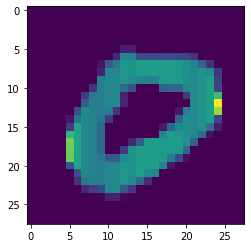

In [18]:
# preprocessing and normalizing data
x_train = tf.keras.utils.normalize(x_train, axis=1)
print(x_train)
x_test = tf.keras.utils.normalize(x_test, axis= 1)
plt.imshow(x_train[83],cmap=plt.cm.binary)
plt.imshow(x_train[1678])
plt.show()


In [21]:
import numpy as np
#print(np.shape(x_test))
x_train = np.reshape(x_train,(60000,28,28,1))
x_test = np.reshape(x_test,(10000,28,28,1))
print(np.shape(x_train))

(60000, 28, 28, 1)


In [22]:
#build the model
#x_train = np.expand_dims(x_train,axis=1)
#x_test = np.expand_dims(x_test,axis=3)
print(x_train.shape)
model = keras.models.Sequential([
              keras.layers.InputLayer(input_shape=(28,28,1)),
              keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation=tf.nn.relu),
              keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation=tf.nn.relu),
              keras.layers.MaxPooling2D(pool_size=(2,2)),
              keras.layers.Dropout(0.25),
              keras.layers.Flatten(input_shape=(28,28,1)),
              keras.layers.Dense(10,activation=tf.nn.softmax)
              ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#model.add(keras.layers.Flatten(input_shape=(28,28,1)))
#model.add(keras.layers.Dense(128, activation=tf.nn.relu))
#model.add(keras.layers.Dense(100, activation=tf.nn.relu))
#model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


(60000, 28, 28, 1)


In [23]:
#fit the model
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 48s 3ms/step - loss: 0.3460 - accuracy: 0.8942 - val_loss: 0.0615 - val_accuracy: 0.9811
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0629 - accuracy: 0.9813 - val_loss: 0.0468 - val_accuracy: 0.9856
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0416 - accuracy: 0.9873 - val_loss: 0.0436 - val_accuracy: 0.9865
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0302 - accuracy: 0.9901 - val_loss: 0.0393 - val_accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0237 - accuracy: 0.9922 - val_loss: 0.0396 - val_accuracy: 0.9874


In [24]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                92170     
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
__________________________________________________

In [26]:
#test 

val_loss, val_accuracy = model.evaluate(x_test,y_test)
print(val_loss, val_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0396 - accuracy: 0.9874
0.0396486297249794 0.9873999953269958


In [ ]:
#save the model
#model.save('epic_num_reader.model')
#new_model = keras.models.load_model('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


(10000, 10)
[9.6459519e-07 3.7735308e-09 4.6211690e-02 6.4533055e-01 1.6677325e-07
 1.4663179e-01 8.5836362e-08 4.1355852e-07 1.6182411e-01 2.2395268e-07]
3


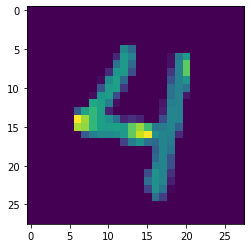

In [27]:
predictions = model.predict(x_test)
print(predictions.shape)

print(predictions[18])
print(np.argmax(predictions[18]))
plt.imshow(np.reshape(x_test[27],(28,28)))


In [ ]:
#test with the numbers I drawed  

#from PIL import Image
#import PIL.ImageOps 

#b = keras.utils.normalize(imgArray, axis=1)

#img = Image.open('3.jpg')
#img = img.convert('L')
#img = PIL.ImageOps.invert(img)
#imgArray = np.array(img)
#print(imgArray.shape)
#res = cv2.resize(imgArray, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
#a = np.resize(imgArray,(890,709,3)) 
#print(res.shape)
#plt.imshow(res)
#plt.show()
#plt.imshow(imgArray,plt.cm.binary)
#res = keras.utils.normalize(res, axis=1)
#res = np.reshape(res,(1,28,28,1))
#print(res.shape)
#print(model.predict(res))
#print(np.argmax(model.predict(res)))
#


In [29]:
#Convert tf model to tf lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
print(type(tflite_model))

INFO:tensorflow:Assets written to: /tmp/tmpwxm3ca1q/assets
<class 'bytes'>


In [31]:
# save the lite model
with open('DigitReco.tflite','wb') as file:
  file.write(tflite_model)

